## Task 1 - SQL

### Build SparkSession:

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.getOrCreate()

### Read the json file:

In [5]:
df = spark.read.json('DataFrames_sample.json')

### Display the schema:


In [6]:
df.printSchema()

root
 |-- D: double (nullable = true)
 |-- H: double (nullable = true)
 |-- HDD: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- Model: string (nullable = true)
 |-- RAM: string (nullable = true)
 |-- ScreenSize: string (nullable = true)
 |-- W: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Year: long (nullable = true)



In [7]:
df.show()

+----+----+---------+---+-----------+----+----------+-----+------+----+
|   D|   H|      HDD| Id|      Model| RAM|ScreenSize|    W|Weight|Year|
+----+----+---------+---+-----------+----+----------+-----+------+----+
|9.48|0.61|512GB SSD|  1|MacBook Pro|16GB|       15"|13.75|  4.02|2015|
|7.74|0.52|256GB SSD|  2|    MacBook| 8GB|       12"|11.04|  2.03|2016|
|8.94|0.68|128GB SSD|  3|MacBook Air| 8GB|     13.3"| 12.8|  2.96|2016|
| 8.0|20.3|  1TB SSD|  4|       iMac|64GB|       27"| 25.6|  20.8|2017|
+----+----+---------+---+-----------+----+----------+-----+------+----+



### Get all the data when "Model" equal "MacBook Pro":




In [8]:
from pyspark.sql.functions import col

df.filter(col('Model') == 'MacBook Pro').show()

+----+----+---------+---+-----------+----+----------+-----+------+----+
|   D|   H|      HDD| Id|      Model| RAM|ScreenSize|    W|Weight|Year|
+----+----+---------+---+-----------+----+----------+-----+------+----+
|9.48|0.61|512GB SSD|  1|MacBook Pro|16GB|       15"|13.75|  4.02|2015|
+----+----+---------+---+-----------+----+----------+-----+------+----+



### Create TempView:

In [9]:
df.createOrReplaceTempView("tbl_1")

### Display "RAM"column and count "RAM" column:

In [10]:
spark.sql("""SELECT RAM, COUNT(RAM)\
          FROM tbl_1\
          GROUP BY RAM""").show()

+----+----------+
| RAM|count(RAM)|
+----+----------+
|64GB|         1|
|16GB|         1|
| 8GB|         2|
+----+----------+



### Get all columns when "Year" column equal "2015"  

In [11]:
spark.sql("""SELECT *\
          FROM tbl_1\
          WHERE Year == 2015""").show()

+----+----+---------+---+-----------+----+----------+-----+------+----+
|   D|   H|      HDD| Id|      Model| RAM|ScreenSize|    W|Weight|Year|
+----+----+---------+---+-----------+----+----------+-----+------+----+
|9.48|0.61|512GB SSD|  1|MacBook Pro|16GB|       15"|13.75|  4.02|2015|
+----+----+---------+---+-----------+----+----------+-----+------+----+



### Get all when "Model" start with "M":

In [12]:
spark.sql("""SELECT *\
          FROM tbl_1\
          WHERE Model LIKE 'M%'""").show()

+----+----+---------+---+-----------+----+----------+-----+------+----+
|   D|   H|      HDD| Id|      Model| RAM|ScreenSize|    W|Weight|Year|
+----+----+---------+---+-----------+----+----------+-----+------+----+
|9.48|0.61|512GB SSD|  1|MacBook Pro|16GB|       15"|13.75|  4.02|2015|
|7.74|0.52|256GB SSD|  2|    MacBook| 8GB|       12"|11.04|  2.03|2016|
|8.94|0.68|128GB SSD|  3|MacBook Air| 8GB|     13.3"| 12.8|  2.96|2016|
+----+----+---------+---+-----------+----+----------+-----+------+----+



### Get all data when "Model" column equal "MacBook Pro"

In [13]:
spark.sql("""SELECT *\
          FROM tbl_1\
          WHERE Model == 'MacBook Pro'""").show()

+----+----+---------+---+-----------+----+----------+-----+------+----+
|   D|   H|      HDD| Id|      Model| RAM|ScreenSize|    W|Weight|Year|
+----+----+---------+---+-----------+----+----------+-----+------+----+
|9.48|0.61|512GB SSD|  1|MacBook Pro|16GB|       15"|13.75|  4.02|2015|
+----+----+---------+---+-----------+----+----------+-----+------+----+



### Get all data with Multiple Conditions when "RAM" column equal "8GB" and "Model" column is "Macbook".

In [14]:
spark.sql("""SELECT *\
          FROM tbl_1\
          WHERE RAM == '8GB'\
          AND Model == 'MacBook'""").show()

+----+----+---------+---+-------+---+----------+-----+------+----+
|   D|   H|      HDD| Id|  Model|RAM|ScreenSize|    W|Weight|Year|
+----+----+---------+---+-------+---+----------+-----+------+----+
|7.74|0.52|256GB SSD|  2|MacBook|8GB|       12"|11.04|  2.03|2016|
+----+----+---------+---+-------+---+----------+-----+------+----+



### Get all data with Multiple Conditions when "D" greater than or equal "8" and "Model" column is "iMac".

In [15]:
spark.sql("""SELECT *\
          FROM tbl_1\
          WHERE D >= 8\
          AND Model == 'iMac'""").show()

+---+----+-------+---+-----+----+----------+----+------+----+
|  D|   H|    HDD| Id|Model| RAM|ScreenSize|   W|Weight|Year|
+---+----+-------+---+-----+----+----------+----+------+----+
|8.0|20.3|1TB SSD|  4| iMac|64GB|       27"|25.6|  20.8|2017|
+---+----+-------+---+-----+----+----------+----+------+----+



## Task 2


### Read "test1" dataset:

In [16]:
df_2 = (spark.read.format('csv')
    .schema("Name STRING, age INT, Experience INT, Salary INT")
    .option('header','true')
    .load('test1.csv')
)

df_2.createOrReplaceTempView("tbl_2")

In [17]:
df_2.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [18]:
df_2.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



### Display Salary of the people less than or equal to 20000

In [19]:
spark.sql("""SELECT Name, Salary\
          FROM tbl_2\
          WHERE Salary <= 20000""").show()

+-------+------+
|   Name|Salary|
+-------+------+
|  Sunny| 20000|
|   Paul| 20000|
| Harsha| 15000|
|Shubham| 18000|
+-------+------+



### Display Salary of the people less than or equal to 20000 and greater than or equal 15000

In [20]:
spark.sql("""SELECT Name, Salary\
          FROM tbl_2\
          WHERE Salary <= 20000\
          AND Salary >= 15000""").show()

+-------+------+
|   Name|Salary|
+-------+------+
|  Sunny| 20000|
|   Paul| 20000|
| Harsha| 15000|
|Shubham| 18000|
+-------+------+



## Task 3 

### Read "test3" dataset:

In [21]:
df_3 = (spark.read.format('csv')
    .schema("Name STRING, Departments STRING, Salary INT")
    .option('header','true')
    .load('test3.csv')
)

df_3.createOrReplaceTempView("tbl_3")

### Display dataset

In [22]:
df_3.show()

+---------+------------+------+
|     Name| Departments|Salary|
+---------+------------+------+
|    Krish|Data Science| 10000|
|    Krish|         IOT|  5000|
|   Mahesh|    Big Data|  4000|
|    Krish|    Big Data|  4000|
|   Mahesh|Data Science|  3000|
|Sudhanshu|Data Science| 20000|
|Sudhanshu|         IOT| 10000|
|Sudhanshu|    Big Data|  5000|
|    Sunny|Data Science| 10000|
|    Sunny|    Big Data|  2000|
+---------+------------+------+



### Display schema

In [23]:
df_3.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Departments: string (nullable = true)
 |-- Salary: integer (nullable = true)



### Group by "Name" column and using sum function on "Name" column

In [24]:
spark.sql("""SELECT Name, SUM(Salary)\
          FROM tbl_3\
          GROUP BY Name""").show()

+---------+-----------+
|     Name|sum(Salary)|
+---------+-----------+
|Sudhanshu|      35000|
|    Sunny|      12000|
|    Krish|      19000|
|   Mahesh|       7000|
+---------+-----------+



### Group by "Name" column and using avg function on "Name" column

In [25]:
spark.sql("""SELECT Name, round(AVG(Salary),2)\
          FROM tbl_3\
          GROUP BY Name""").show()

+---------+-------------------------------------+
|     Name|round(avg(CAST(Salary AS BIGINT)), 2)|
+---------+-------------------------------------+
|Sudhanshu|                             11666.67|
|    Sunny|                               6000.0|
|    Krish|                              6333.33|
|   Mahesh|                               3500.0|
+---------+-------------------------------------+



### Group by "Departments" column and using sum function on "Departments" column

In [26]:
spark.sql("""SELECT Departments, SUM(Salary)\
          FROM tbl_3\
          GROUP BY Departments""").show()

+------------+-----------+
| Departments|sum(Salary)|
+------------+-----------+
|         IOT|      15000|
|    Big Data|      15000|
|Data Science|      43000|
+------------+-----------+



### Group by "Departments" column and using mean function on "Departments" column:

In [27]:
spark.sql("""SELECT Departments, MEAN(Salary)\
          FROM tbl_3\
          GROUP BY Departments""").show()

+------------+------------+
| Departments|mean(Salary)|
+------------+------------+
|         IOT|      7500.0|
|    Big Data|      3750.0|
|Data Science|     10750.0|
+------------+------------+



### Group by "Departments" column and using count function on "Departments" column:

In [28]:
spark.sql("""SELECT Departments, COUNT(Departments)\
          FROM tbl_3\
          GROUP BY Departments""").show()

+------------+------------------+
| Departments|count(Departments)|
+------------+------------------+
|         IOT|                 2|
|    Big Data|                 4|
|Data Science|                 4|
+------------+------------------+



### Apply agg to using sum function get the total of salaries

In [29]:
df_3.agg({"Salary": "sum"}).show()

+-----------+
|sum(Salary)|
+-----------+
|      73000|
+-----------+



## Task 4

You've been flown to their headquarters in Ulsan, South Korea, to assist them in accurately estimating the number of crew members a ship will need.


They're currently building new ships for certain customers, and they'd like you to create a model and utilize it to estimate how many crew members the ships will require.


Metadata:
1. Measurements of ship size 
2. capacity 
3. crew 
4. age for 158 cruise ships.

It is saved in a csv file for you called "ITI_data.csv". our task is to develop a regression model that will assist in predicting the number of crew members required for future ships. The client also indicated that they have found that particular cruise lines will differ in acceptable crew counts, thus this is most likely an important factor to consider when conducting your investigation.

In [30]:
df_ml = (spark.read.format('csv')
    .schema("Ship_name STRING, Cruise_line STRING, Age INT, Tonnage DOUBLE, passengers DOUBLE, length DOUBLE, cabins DOUBLE, passenger_density DOUBLE, crew DOUBLE")
    .option('header','true')
    .load('ITI_data.csv')
)

In [31]:
df_ml.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [32]:
df_ml.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [33]:
df_ml.createOrReplaceTempView("tbl_ml")

explor_df = spark.sql("""SELECT Cruise_line, COUNT(Cruise_line) as count, AVG(crew) as avg\
          FROM tbl_ml\
          GROUP BY Cruise_line""")

explor_df.show()

+-----------------+-----+------------------+
|      Cruise_line|count|               avg|
+-----------------+-----+------------------+
|            Costa|   11|               7.7|
|              P&O|    6| 8.588333333333333|
|           Cunard|    3|10.246666666666668|
|Regent_Seven_Seas|    5|             3.146|
|              MSC|    8|              7.54|
|         Carnival|   22| 10.13590909090909|
|          Crystal|    2|             5.905|
|           Orient|    1|               3.5|
|         Princess|   17|  9.32235294117647|
|        Silversea|    4|            2.4725|
|         Seabourn|    3|1.6000000000000003|
| Holland_American|   14| 6.215000000000002|
|         Windstar|    3|1.1866666666666668|
|           Disney|    2|              9.45|
|        Norwegian|   13| 8.087692307692308|
|          Oceania|    3|               4.0|
|          Azamara|    2|              3.55|
|        Celebrity|   10|             8.072|
|             Star|    6| 5.363333333333333|
|  Royal_C

In [34]:
x  = df_ml.select('Cruise_line').toPandas()
y  = df_ml.select('crew').toPandas()

In [35]:
import pandas as pd
x_num = pd.factorize([i[0] for i in x.values])[0]

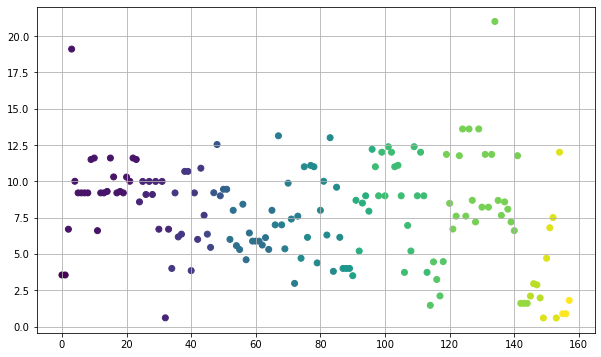

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(len(y)), y, c=x_num)
plt.grid()

In [37]:
trainDF, testDF = df_ml.randomSplit([0.8, 0.2], seed=42)
print(f"There are {trainDF.count()} rows in the training set, and {testDF.count()} in the test set")

There are 133 rows in the training set, and 25 in the test set


### OneHotEncoder 


In [38]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

In [39]:
categoricalCols = [field for (field, dataType) in trainDF.dtypes
                   if ((dataType == "string") & (field!='Ship_name'))]

indexOutputCols = [x + "_Index" for x in categoricalCols]

oheOutputCols = [x + "_OHE" for x in categoricalCols]

In [40]:
stringIndexer = StringIndexer(inputCols=categoricalCols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')

oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)

In [41]:
numericCols = [field for (field,dataType) in trainDF.dtypes
              if ((dataType=='double') & (field!='crew'))]

In [42]:
assemblerInputs = oheOutputCols + numericCols

### Use VectorAssembler to merge all columns into one column:

In [43]:
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')

### Create a Linear Regression Model 

In [44]:
lr = LinearRegression(labelCol='crew', featuresCol='features')

### Creating a Pipeline

In [45]:
pipeline = Pipeline(stages = [stringIndexer, oheEncoder, vecAssembler, lr])

In [46]:
pipelineModel = pipeline.fit(trainDF)

predDF = pipelineModel.transform(testDF)

In [47]:
predDF.select('features','crew','prediction').show()

+--------------------+-----+------------------+
|            features| crew|        prediction|
+--------------------+-----+------------------+
|(23,[3,18,19,20,2...|  6.0| 6.059715078897999|
|(23,[10,18,19,20,...|  5.2| 5.210426045129075|
|(23,[10,18,19,20,...|  8.5| 8.607840686711796|
|(23,[5,18,19,20,2...| 6.17| 5.516612653085311|
|(23,[2,18,19,20,2...| 12.0|12.872539847152717|
|(23,[2,18,19,20,2...|12.38|11.579433236712907|
|(23,[1,18,19,20,2...|  7.6|  7.85669608016238|
|(23,[0,18,19,20,2...|  9.2|  9.07434678585187|
|(23,[2,18,19,20,2...| 11.1|11.329758981653582|
|(23,[1,18,19,20,2...|  7.6|  7.85669608016238|
|(23,[0,18,19,20,2...|  6.6| 6.551436275664504|
|(23,[1,18,19,20,2...| 13.6|14.432430323959595|
|(23,[15,18,19,20,...|  4.0| 3.999999999999999|
|(23,[1,18,19,20,2...| 8.69|  8.58219781248828|
|(23,[9,18,19,20,2...|  6.8| 7.905248718745608|
|(23,[0,18,19,20,2...| 10.3| 10.01174833645084|
|(23,[13,18,19,20,...|  9.0|10.365398826143785|
|(23,[4,18,19,20,2...|  6.3|  6.74666132

### Model Evaluation

In [48]:
regressionEvaluator = RegressionEvaluator(predictionCol='prediction',
                                         labelCol='crew',
                                         metricName='rmse')

rmse = regressionEvaluator.evaluate(predDF)
print(f"RMSE is {rmse:.1f}")

RMSE is 0.5


In [49]:
r2 = RegressionEvaluator(predictionCol='prediction',
                                         labelCol='crew',
                                         metricName='r2').evaluate(predDF)
print(f"R2 is {r2}")

R2 is 0.9728301900481248


By Eng. Mostafa Nabieh 
If you have questions, please feel free to ask.

My Email : nabieh.mostafa@yahoo.com

My Whatsapp : +201015197566